# Unsupervised Learning: Clustering Lab





In [6]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from scipy.io import arff

## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Mmeans model with the paramaters K-means(n_clusters=3, init='random', n_init=1) 

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [7]:
Data_Set = arff.loadarff(f'datasets/abalone.arff')
df = pd.DataFrame(Data_Set[0])

display(df.head())
# display(df["Rings"].value_counts())

x = df.to_numpy()

# X = pd.get_dummies(df.drop('Type', axis=1)).to_numpy()
# y = df['Type'].to_numpy()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [8]:
# K-means with Abalone

kmeans = KMeans(
  n_clusters=15,
  init='random',
  n_init=1
).fit(x)

print(f"K Means Lables: {kmeans.labels_}")
print(f"K Means Cluster Centers: {kmeans.cluster_centers_}")
print(f"K Means Number of Itterations: {kmeans.n_iter_}")
print(f"K Means Total Sum Squared Error: {kmeans.inertia_}")
print(f"K Means Average Silhouette Score: {silhouette_score(x, kmeans.fit_predict(x))}")


K Means Lables: [ 2  6  0  9  6  0  3  8  0  4  2  9 11  9  9 10  6  9  6  0 11  9 10  0
 12 11 11 10  2 11 12  2  4  4  1  0  8  0 11  0  0  2 13 13 13  6  0 14
 13  0  0  6  9  9 14  0  0  0 13 14 14  0  9 14  0  0 10  1  9 13  7  0
  3 11  7  2  0 12 11  2  0  5  8  3  2  5  1 12  0 10  2 10  7 12  2  2
  0  0 14  9  6  2  2  9  5 10 11  9  0  0  0  0  0  0 11 11 11  9  0  0
  0  6  2 13 13 13 13  0  4  4  8  0  6  6  6  0  6  0  0  0 12  9  8 11
  9  9  9  0 13 13  2  0 12 12 10  9  7  8  7  7  7  1  5  4  8  2  3  3
  2  5  2 14  0  0 13  6 13  0 13 11  2  3 12 12  5  1 10 12 11  0  1 10
  2  0 12 10 11  8  2 12]
K Means Cluster Centers: [[ 0.46467391  0.36380435  0.11804348  0.52909783  0.22107609  0.1243913
   0.16508696  8.60869565]
 [ 0.6275      0.49416667  0.17583333  1.29816667  0.51525     0.2685
   0.38916667 13.        ]
 [ 0.59785714  0.47404762  0.16190476  1.16204762  0.46064286  0.24745238
   0.36904762 14.47619048]
 [ 0.6275      0.50333333  0.1725      1.446       

#### Discussion
Discuss your results. Run it a few times. What happens? How did the cluster silhouette scores compare? <br>
Now play around with k. What happens to the clusters and silhouette scores?

** Your discussion goes here **

It apears that the number of itterations to converge has a pretty wide range from 3 to 10. It also appears that the average silhouette score stays between a pretty consistant 0.50-0.51, with occasional jumps to 0.55, but nothing inbetween.

When I moved k up to 15, the number of itterations until convergance goes from 3-10, up to around 5-11. It also appears that the silhouette score can get all the way up to 0.60, but goes lower too with dipping down to 0.47.

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC) 

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [9]:
# HAC with Abalone

hac = AgglomerativeClustering(
  n_clusters=3
).fit(x)

print(f"K Means Lables: {hac.labels_}")
print(f"K Means Average Silhouette Score: {silhouette_score(x, kmeans.fit_predict(x))}")

itters = 50
total = 0

for i in range(itters):
  hac = AgglomerativeClustering(
    n_clusters=3
  ).fit(x)

  total += silhouette_score(x, kmeans.fit_predict(x))

print(f"K Means Actual Average Silhouette Score: {total/itters}")


K Means Lables: [1 0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 2 2 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 0
 1 1 0 0 0 1 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 0 1 2 0 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0]
K Means Average Silhouette Score: 0.5272414558687584
K Means Actual Average Silhouette Score: 0.5449869227458174


#### Discussion
How do the clusters compare to your results above? Explain the differences using what you know about HAC.

** Your discussion goes here **

One thing that was really different is that when I tried increasing the number of clusters from 3 -> 15, I did not get any sort of boost to the average silhouette score, it remained exactly the same. Potentally this is due to the fact that HAC is calculated by jointing individual groups together instead of splitting them apart by whichever centroid is closest.

## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)
Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [10]:
# K-means initial centroid experiments
# def runkmeans(x):
#   kmeans = KMeans(
#     n_clusters=4,
#     init='random',
#     n_init=1
#   ).fit(x)

#   print("-----------------------------")
#   # print(f"K Means Lables: {kmeans.labels_}")
#   # print(f"K Means Cluster Centers: {kmeans.cluster_centers_}")
#   print(f"K Means Number of Itterations: {kmeans.n_iter_}")
#   print(f"K Means Total Sum Squared Error: {kmeans.inertia_}")
#   print(f"K Means Average Silhouette Score: {silhouette_score(x, kmeans.fit_predict(x))}")

# runkmeans(x)
# runkmeans(x)
# runkmeans(x)
# runkmeans(x)
# runkmeans(x)

kmeans = KMeans(
  n_clusters=4,
  init='k-means++',
  n_init=1
).fit(x)

print(f"K Means Total Sum Squared Error: {kmeans.inertia_}")
print(f"K Means Average Silhouette Score: {silhouette_score(x, kmeans.fit_predict(x))}")

K Means Total Sum Squared Error: 360.6992005892767
K Means Average Silhouette Score: 0.541168473202495



#### Manually Repeating K-Means:
| # | K Means Number of Iterations | K Means Total Sum Squared Error | K Means Average Silhouette Score |
| - | ---------------------------- | ------------------------------- | -------------------------------- |
| 1 | 3                            | 281.06170654145393              | 0.5049411209488729               |
| 2 | 3                            | 288.3292392757027               | 0.5049411209488729               |
| 3 | 5                            | 386.70806378580426              | 0.45606285321751566              |
| 4 | 3                            | 281.06170654145393              | 0.4962207994775574               |
| 5 | 7                            | 309.5236481903839               | 0.4903295935141712               |

#### Using n_init = 5:
K Means Total Sum Squared Error: 309.5236481903839
K Means Average Silhouette Score: 0.5274734073610277

#### Using init = k-means++:
K Means Total Sum Squared Error: 279.1134553412336
K Means Average Silhouette Score: 0.5351351248433276


---
#### Discussion
Discuss your results. How does n_init work and compare with your first results without using n_init. <br>
How does K-means++ work? Compare it to your previous runs.

** Your dicussion goes here **

From the results that I got, it looks as though somehow using the n_init value made the model score quite a bit higher in the average silhouette score (higher than any of the manually repeated runs), but lead to an increase in the total sum squared error (on par with the highest manual run). When comparing that to k-means++, the kmeans++ did the best overall, getting a lower sum squared error than any other run as well as a higher silhouette score than any previous run. This is quite impressive, and it shows that maybe k-means++ should be used for this dataset.

### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

Visualizer for k=2


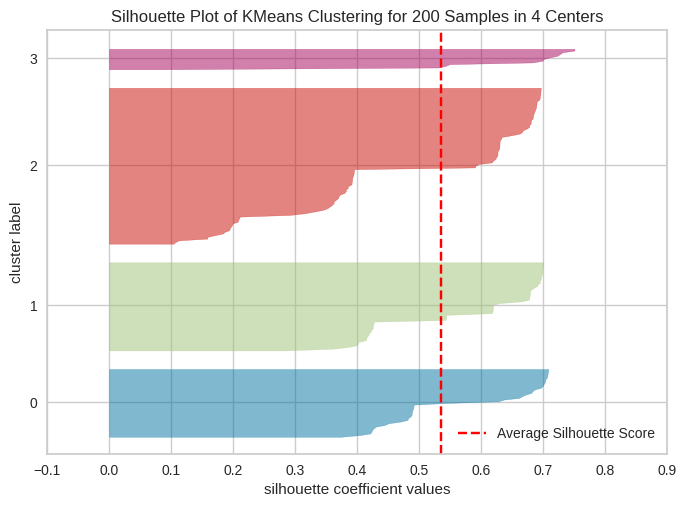

Visualizer for k=3


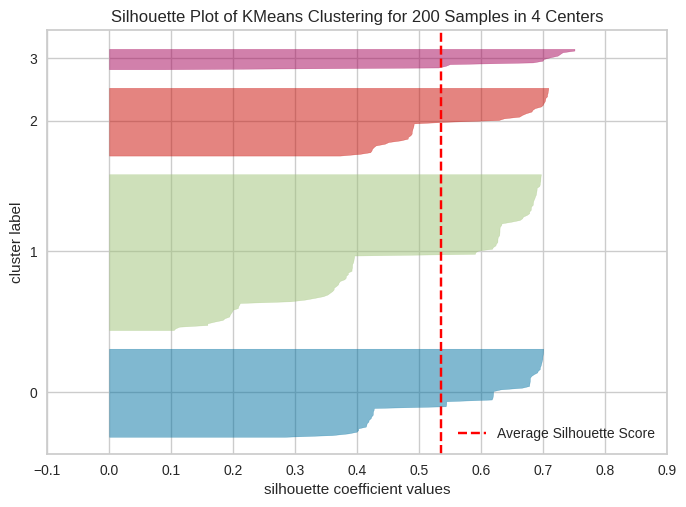

Visualizer for k=4


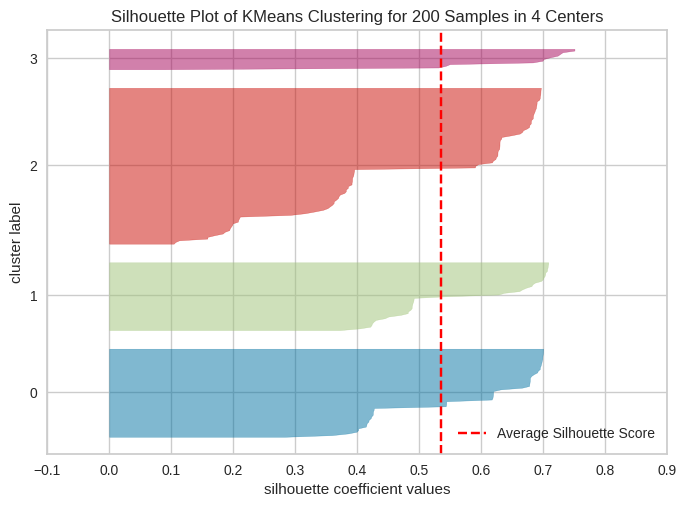

Visualizer for k=5


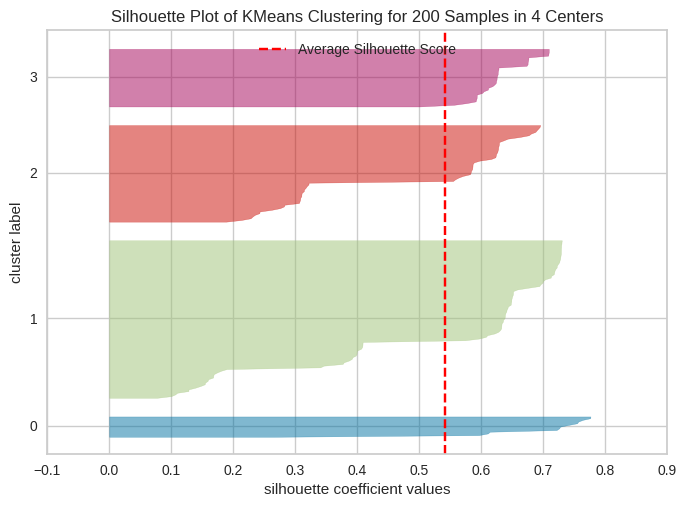

Visualizer for k=6


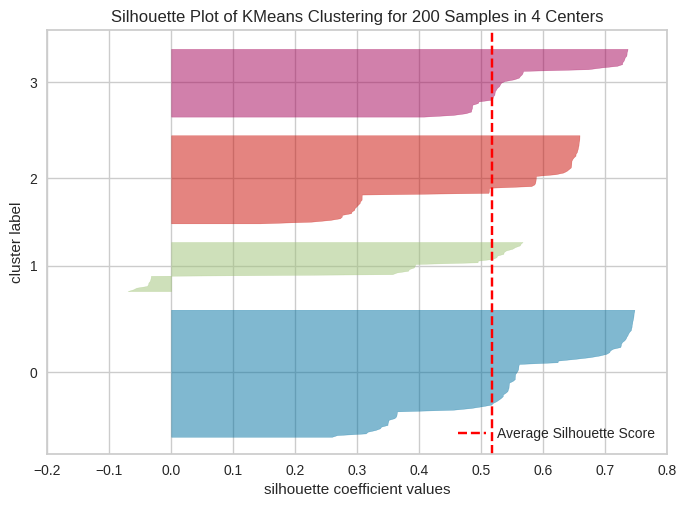

In [16]:
# Iris Clustering with K-means and silhouette graphs
from yellowbrick.cluster import SilhouetteVisualizer

def visualize(k):
  kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=1
  ).fit(x)

  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

  visualizer.fit(x)

  print(f"Visualizer for k={k}")
  visualizer.show()

visualize(2)
visualize(3)
visualize(4)
visualize(5)
visualize(6)

#### Discussion
Discuss your results and justify which clustering is best based on the silhouette graphs

** Your discussion goes here **

I think that k=4 is the best because all of the silhoette graphs are the closest. There is still a spread of widths, but the length of the graphs seem to be the most simular around k=4 (with k=3 very close behind)

## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [19]:
#HAC with Iris

def run_hac(k, linkage):
  hac = AgglomerativeClustering(
    n_clusters=3
  ).fit(x)

  print("-----------------------------------")

  print(f"K={k}, Linkage: {linkage}")
  print(f"Silhouette Score: {silhouette_score(x, kmeans.fit_predict(x))}")

run_hac(2, "single")
run_hac(3, "single")
run_hac(4, "single")
run_hac(5, "single")
run_hac(6, "single")


run_hac(2, "average")
run_hac(3, "average")
run_hac(4, "average")
run_hac(5, "average")
run_hac(6, "average")


run_hac(2, "complete")
run_hac(3, "complete")
run_hac(4, "complete")
run_hac(5, "complete")
run_hac(6, "complete")


run_hac(2, "ward")
run_hac(3, "ward")
run_hac(4, "ward")
run_hac(5, "ward")
run_hac(6, "ward")


-----------------------------------
K=2, Linkage: single
Silhouette Score: 0.4962207994775574
-----------------------------------
K=3, Linkage: single
Silhouette Score: 0.4903295935141712
-----------------------------------
K=4, Linkage: single
Silhouette Score: 0.5136751639024545
-----------------------------------
K=5, Linkage: single
Silhouette Score: 0.4903295935141712
-----------------------------------
K=6, Linkage: single
Silhouette Score: 0.5136751639024545
-----------------------------------
K=2, Linkage: average
Silhouette Score: 0.5351351248433276
-----------------------------------
K=3, Linkage: average
Silhouette Score: 0.5274734073610277
-----------------------------------
K=4, Linkage: average
Silhouette Score: 0.5351351248433276
-----------------------------------
K=5, Linkage: average
Silhouette Score: 0.45606285321751566
-----------------------------------
K=6, Linkage: average
Silhouette Score: 0.5049411209488729
-----------------------------------
K=2, Linkage: comp

### Table

| #  | K | Linkage  | Silhouette Score    |
| -- | - | -------- | ------------------- |
| 1  | 2 | single   | 0.4962207994775574  |
| 2  | 3 | single   | 0.4903295935141712  |
| 3  | 4 | single   | 0.5136751639024545  |
| 4  | 5 | single   | 0.4903295935141712  |
| 5  | 6 | single   | 0.5136751639024545  |
| 6  | 2 | average  | 0.5351351248433276  |
| 7  | 3 | average  | 0.5274734073610277  |
| 8  | 4 | average  | 0.5351351248433276  |
| 9  | 5 | average  | 0.45606285321751566 |
| 10 | 6 | average  | 0.5049411209488729  |
| 11 | 2 | complete | 0.5274734073610277  |
| 12 | 3 | complete | 0.48283259871692563 |
| 13 | 4 | complete | 0.5049411209488729  |
| 14 | 5 | complete | 0.5049411209488729  |
| 15 | 6 | complete | 0.5136751639024545  |
| 16 | 2 | ward     | 0.5136751639024545  |
| 17 | 3 | ward     | 0.5363314744177542  |
| 18 | 4 | ward     | 0.5049411209488729  |
| 19 | 5 | ward     | 0.5351351248433276  |
| 20 | 6 | ward     | 0.5136751639024545  |

#### Discussion
Discuss your results and compare with your k-means results. <br>
Discuss your table that contains the silhouette scores for k=2,3,4,5,6 and for each of the different linkage options. <br>
Discuss how the linkage options affect your scores.

** Your discussion goes here **

It looks as though for each of the options (single, average, complete, and ward), the silhouette score seemed to dip in the middle, around 3 and 4, but rise up again from 2 and around 5 and 6. This does not make sense as reguardless of the linkage type, when we looked above at the shiloette graphs, we saw that a k of 3 or 4 is the best, so it does not make sense that the silhouette score is the smallest around there. As for the linkage options, it seems like they didn't really make too much of a differeence, but it does look like ward and average did the best, and complete and single did the worst, but it is only by a little bit








## 4 (20%) Run both algorithms on a real world data
- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different parameters and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

In [34]:
# Run both algoriths on a data set of your choice

from ucimlrepo import fetch_ucirepo

# fetch dataset 
air_quality = fetch_ucirepo(id=360) 

# df = air_quality.data.combined
  
# display(df.head())
# data (as pandas dataframes) 
X = air_quality.data.features 
y = air_quality.data.targets

print(X.head())

# Combine Date and Time columns into datetime
X['datetime'] = pd.to_datetime(X['Date'] + ' ' + X['Time'])

# Convert datetime to Unix timestamp (integer seconds)
X['timestamp'] = X['datetime'].astype(int) // 10**9  # or use .view('int64') in newer pandas

# Now you can drop the original Date and Time and use 'timestamp' as a feature for clustering
X = X.drop(columns=['Date', 'Time', 'datetime'])

display(X.head())

# x

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4 

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,timestamp
0,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,1078941600
1,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,1078945200
2,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502,1078948800
3,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867,1078952400
4,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,1078956000


In [45]:
kmeans = KMeans(
  n_clusters=10,
  init='random',
  n_init=1
).fit(X)

print(f"K Means Total Sum Squared Error: {kmeans.inertia_}")
print(f"K Means Average Silhouette Score: {silhouette_score(X, kmeans.fit_predict(X))}")

hac = AgglomerativeClustering(
  n_clusters=10
).fit(X)

print(f"HAC Silhouette Score: {silhouette_score(X, kmeans.fit_predict(X))}")


K Means Total Sum Squared Error: 8876869016193786.0
K Means Average Silhouette Score: 0.5385886409145559
HAC Silhouette Score: 0.5382843032350447


| # | k  | K Means Average Silhouette Score | HAC Silhouette Score |
| - | -- | -------------------------------- | -------------------- |
| 1 | 3  | 0.590065680478916                | 0.590065680478916    |
| 2 | 5  | 0.5607810713991255               | 0.5607246820213654   |
| 3 | 10 | 0.5385886409145559               | 0.5382843032350447   |
| 4 | 15 | 0.5308867070384053               | 0.5309567463481752   |

#### Discussion 
Discuss your results and compare the algorithms you used. Which worked best? How do you know? Base your discussion on what you know about the algorithms and the hyperparameters and scoring methods. Why would you choose either algorithm?

** Your discussion goes here **

I tried both the K-Means algorithm and the HAC algorithm, and for each given k, the score was almost exactly the same. I would say that if I had to choose, I would choose the K-means algorithm, but it just won by 0.0001 on k=5 and k=10. Overall I would be happy with either algorithm. 

## 5. Extra Credit for Coding Your Own Clustering Algorithms
### 5.1 (Optional 10% extra credit) Code up the K-means clustering algorithm 
Below is a scaffold you could use if you want. As above, you only need to support numeric inputs, but think about how you would support nominal inputs and unknown values. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to choose *k* and specify the *k* initial centroids.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

### 5.2 (Optional 10% extra credit) Code up the HAC clustering algorithm 

- Your model should support the methods shown in the example scaffold below.
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from *n* to 2.  You just need to output results for the curent chosen *k*.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

#### Discussion
Discussion and comparision of each model implemented

** Your discussion goes here **

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, ClusterMixin

class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def print_labels(self): # Print the cluster label for each data point
        pass

In [ ]:
class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k
        
    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self
    
    def print_labels(self): # Print the cluster label for each data point
        pass